In [1]:
# all required imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import statistics
import math
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

In [2]:
collist = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67','feature_68','latitude','longitude']

data = pd.read_csv("./dataset/default_features_1059_tracks (copy).csv",names = collist) 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
feature_1     1059 non-null float64
feature_2     1059 non-null float64
feature_3     1059 non-null float64
feature_4     1059 non-null float64
feature_5     1059 non-null float64
feature_6     1059 non-null float64
feature_7     1059 non-null float64
feature_8     1059 non-null float64
feature_9     1059 non-null float64
feature_10    1059 non-null float64
feature_11    1059 non-null float64
feature_12    1059 non-null float64
feature_13    1059 non-null float64
feature_14    1059 non-null float64
feature_15    1059 non-null float64
feature_16    1059 non-null float64
feature_17    1059 non-null float64
feature_18    1059 non-null float64
feature_19    1059 non-null float64
feature_20    1059 non-null float64
feature_21    1059 non-null float64
feature_22    1059 non-null float64
feature_23    1059 non-null float64
feature_24    1059 non-null float64
feature_25    1059 non-null f

In [4]:

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,latitude,longitude
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.8201

In [5]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,latitude,longitude
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,-0.009739,-0.020584,-0.013177,-0.002876,0.005850,-0.011547,0.001516,-0.045074,-0.045770,-0.035677,-0.021926,-0.043428,-0.040145,-0.034628,-0.013943,-0.001377,-0.002940,-0.001075,0.002536,-0.007396,0.007006,0.005717,0.003479,0.002798,-0.061920,-0.056427,-0.021419,-0.017463,-0.008009,-0.016269,-0.012978,0.016907,0.021348,0.030613,0.018534,0.029566,0.026912,0.024524,0.029523,0.032002,0.024929,-0.066779,-0.068595,-0.016383,0.014558,0.006122,-0.012147,-0.003469,0.018174,0.024829,0.025828,0.019925,0.025629,0.021065,0.027439,0.019795,0.023401,0.022533,26.651294,38.405656
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,1.021861,1.019824,1.014239,1.009824,1.013566,1.008664,1.004706,0.974172,0.976912,0.978907,0.976634,0.971008,0.976537,0.985923,0.997837,1.005007,1.005078,1.007265,1.003287,1.001275,1.007848,0.994987,1.010523,1.006530,0.906946,0.952494,0.996328,1.005125,1.001176,0.973540,0.982350,1.014465,1.012536,1.013680,1.016112,1.010212,1.012962,1.008261,1.014314,1.013144,1.014117,0.947516,0.960038,0.993703,0.943230,1.023406,0.996403,0.986890,1.006145,1.018136,1.012146,1.009817,1.008802,1.000416,1.000374,1.003078,1.011060,1.007017,18.459432,50.419790
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,-5.689593,-5.088504,-4.009762,-5.703061,-4.168885,-4.237721,-5.465138,-1.297096,-1.354721,-1.107845,-1.572617,-2.046784,-2.496498,-2.449430,-3.092878,-3.200774,-2.872163,-3.242499,-3.213401,-3.068453,-2.589081,-2.516073,-2.511380,-2.430633,-0.983999,-1.413520,-1.935214,-1.602092,-1.894283,-1.856495,-1.572034,-1.545811,-1.557714,-1.441019,-1.400707,-1.621208,-1.461471,-1.259752,-1.311200,-1.376280,-1.375666,-1.023177,-1.789864,-2.678254,-2.462872,-2.535428,-2.208065,-1.702372,-1.466944,-1.665115,-1.597512,-1.579654,-1.614369,-1.505952,-1.404766,-1.248702,-1.221595,-1.329595,-35.300000,-88.760000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,-0.534840,-0.453784,-0.544439,-0.544919,-0.533688,-0.516786,-0.543627,-0.629327,-0.563929,-0.732387,-0.681518,-0.721838,-0.765705,-0.742398,-0.646702,-0.631441,-0.625023,-0.575735,-0.593027,-0.609992,-0.606038,-0.604720,-0.604341,-0.610660,-0.602015,-0.877019,-0.716862,-0.727

In [6]:
num_cols = data._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(data.columns) - set(num_cols))
print("Categorical Columns:",cat_cols)



Numerical Columns Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'fea

## correlation

In [96]:
BBox = (data.longitude.min(),   data.longitude.max(),      
         data.latitude.min(), data.latitude.max())
print(BBox)

AttributeError: 'numpy.ndarray' object has no attribute 'longitude'

In [ ]:
ruh_m = plt.imread('C:/Users/yashu/Pictures/Screenshots/map.png')

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(data.longitude, data.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on the Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
plt.figure(figsize=(70,50))
sns.heatmap(data.corr(),annot=True)

### Outliers

In [7]:
z_scores = np.abs(stats.zscore(data))

threshold =3

print(np.where(z_scores > 3))

(array([   0,    0,    0,    0,    0,    0,    0,    5,    5,    6,   10,
         10,   10,   10,   12,   12,   14,   14,   14,   14,   14,   14,
         14,   14,   14,   14,   14,   14,   14,   15,   16,   16,   16,
         17,   20,   21,   25,   27,   28,   28,   28,   29,   29,   29,
         29,   29,   34,   34,   34,   34,   34,   34,   35,   35,   36,
         38,   38,   38,   38,   38,   38,   38,   38,   39,   39,   39,
         39,   40,   41,   41,   41,   41,   41,   41,   41,   44,   44,
         44,   48,   49,   49,   49,   49,   49,   49,   49,   49,   49,
         49,   49,   49,   50,   50,   50,   50,   51,   51,   56,   56,
         62,   71,   71,   72,   72,   72,   72,   72,   74,   74,   76,
         76,   77,   89,   89,   93,   93,   93,   93,   93,   97,   97,
         98,   98,   99,  100,  100,  100,  100,  101,  101,  101,  101,
        102,  102,  102,  102,  103,  104,  105,  105,  105,  105,  105,
        105,  105,  105,  105,  106,  109,  109,  

Text(0, 0.5, 'Longitude')

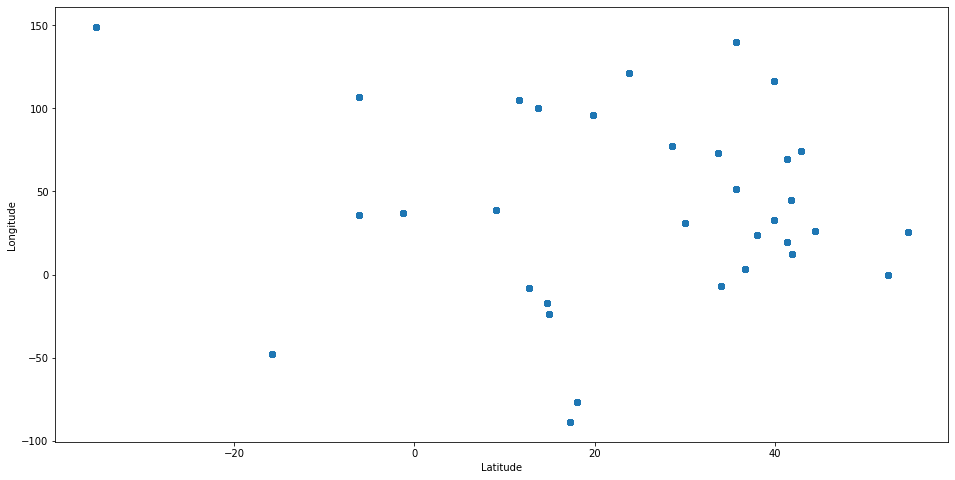

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data["latitude"], data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [9]:
refined_data = data[(z_scores < 3).all(axis=1)]

Text(0, 0.5, 'Longitude')

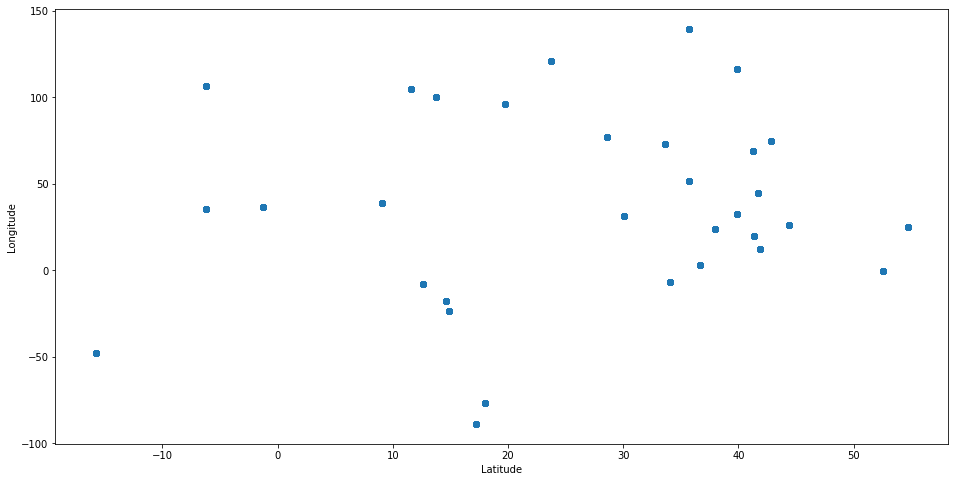

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(refined_data["latitude"], refined_data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

### IQR 


In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature_1      0.919772
feature_2      0.932186
feature_3      0.757918
feature_4      1.099901
feature_5      1.335548
feature_6      1.296298
feature_7      1.252055
feature_8      1.130747
feature_9      1.097180
feature_10     1.033870
feature_11     1.114774
feature_12     1.033144
feature_13     1.112177
feature_14     1.137064
feature_15     1.090975
feature_16     1.089131
feature_17     1.086895
feature_18     0.874962
feature_19     0.794173
feature_20     1.114524
feature_21     1.053709
feature_22     1.190760
feature_23     1.310887
feature_24     1.225308
feature_25     1.088619
feature_26     1.158209
feature_27     1.136740
feature_28     1.059845
feature_29     1.053025
feature_30     1.100582
feature_31     1.069670
feature_32     1.035161
feature_33     1.004023
feature_34     1.009422
feature_35     0.703244
feature_36     1.291493
feature_37     1.251813
feature_38     1.063211
feature_39     1.204875
feature_40     1.110264
feature_41     1.350186
feature_42     1

In [12]:
# print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...        ...        ...        ...   
1054      False      False      False      False      False      False   
1055      False      False      False      False      False      False   
1056      False      False      False      False      False      False   
1057      False      False      False      False      False      False   
1058      False      False      False      False      False      False   

      feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         False      False      Fa

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [13]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
data_iqr.shape

(368, 70)

Text(0, 0.5, 'Longitude')

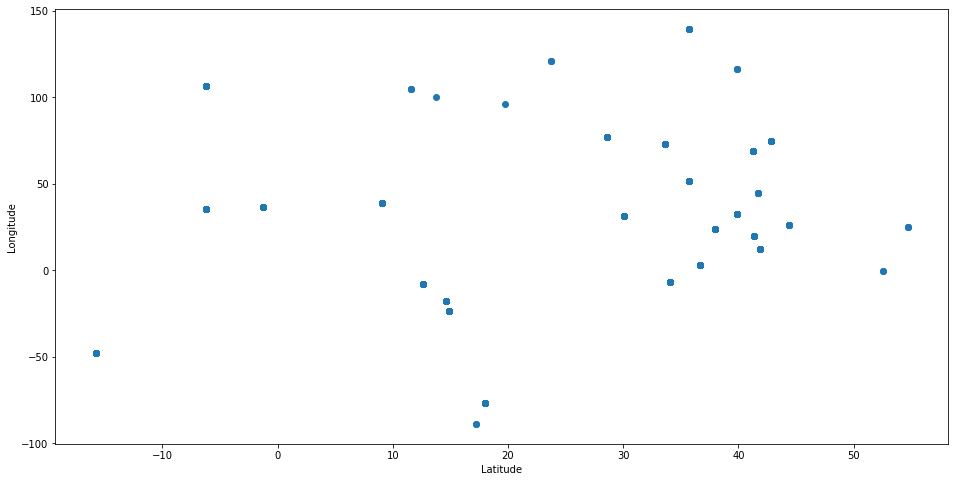

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_iqr["latitude"], data_iqr["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [88]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X = data.iloc[:, 0:68].values
y = data.iloc[:,68:70].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [87]:
y
y.shape

(1059,)

## K-means

In [56]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[ 5.4680e+01  2.5310e+01]
 [ 1.9750e+01  9.6100e+01]
 [ 1.2650e+01 -8.0000e+00]
 [ 9.0300e+00  3.8740e+01]
 [ 4.1260e+01  6.9210e+01]
 [ 3.5700e+01  1.3971e+02]
 [ 1.7250e+01 -8.8760e+01]
 [-1.5750e+01 -4.7950e+01]
 [-3.5300e+01  1.4912e+02]
 [ 3.6700e+01  3.2100e+00]
 [ 3.8000e+01  2.3710e+01]
 [ 3.9910e+01  1.1638e+02]
 [-6.1700e+00  1.0682e+02]
 [ 2.8610e+01  7.7200e+01]
 [ 4.1710e+01  4.4780e+01]
 [ 1.4910e+01 -2.3510e+01]
 [-6.1700e+00  3.5740e+01]
 [ 5.2500e+01 -1.2000e-01]
 [ 3.9910e+01  3.2830e+01]
 [ 2.3760e+01  1.2100e+02]
 [ 3.4030e+01 -6.8500e+00]
 [ 4.1900e+01  1.2480e+01]
 [ 1.3750e+01  1.0048e+02]
 [ 3.0030e+01  3.1210e+01]
 [ 3.3660e+01  7.3160e+01]
 [ 1.7980e+01 -7.6800e+01]
 [ 3.5680e+01  5.1410e+01]
 [ 1.4660e+01 -1.7410e+01]
 [ 4.4410e+01  2.6100e+01]
 [ 4.2860e+01  7.4600e+01]
 [-1.2600e+00  3.6800e+01]
 [ 4.1330e+01  1.9800e+01]
 [ 1.1550e+01  1.0491e+02]]
[ 7 15  2 ... 31  0  0]


<Figure size 1440x360 with 0 Axes>

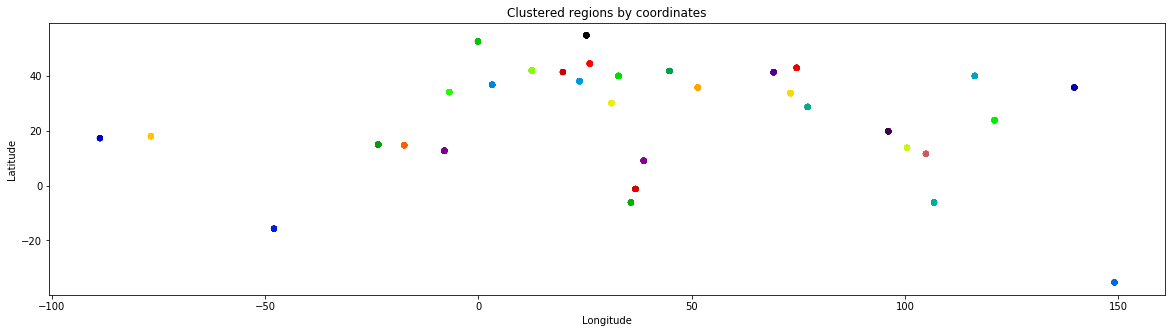

<Figure size 1440x360 with 0 Axes>

In [57]:
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [86]:
y= labels
y.shape

(1059,)

### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
plt.rcParams["figure.figsize"] = (20,5)

dbs = DBSCAN(eps=3, min_samples=2).fit(y)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
dbs_labels = dbs.labels_

n_clusters_ = len(set(dbs_labels)) - (1 if -1 in dbs_labels else 0)
n_noise_ = list(dbs_labels).count(-1)
print(n_clusters_
     )

33


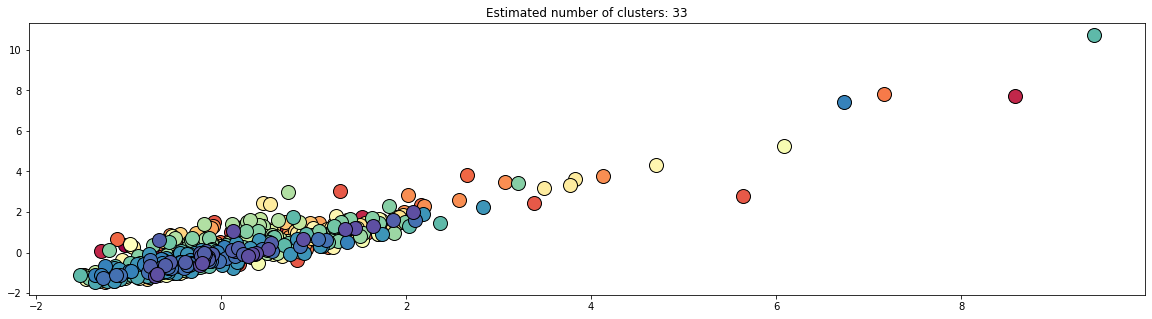

In [23]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


## Factor Analysis

In [24]:
from factor_analyzer import FactorAnalyzer

In [25]:
fa = FactorAnalyzer(rotation = None)
fa.fit(data)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.36258838e+01, 8.22204602e+00, 5.27837864e+00, 4.76511139e+00,
       3.82522255e+00, 2.25865127e+00, 2.09229418e+00, 1.88262351e+00,
       1.74342556e+00, 1.50868204e+00, 1.44949100e+00, 1.38462291e+00,
       1.28803940e+00, 1.13335549e+00, 1.06631135e+00, 1.02801330e+00,
       9.96573177e-01, 9.39349955e-01, 8.71328501e-01, 8.30013163e-01,
       8.02289360e-01, 7.22333745e-01, 6.81309575e-01, 6.34292405e-01,
       6.23728638e-01, 6.14341678e-01, 5.56909176e-01, 5.31183987e-01,
       4.91717242e-01, 4.79448420e-01, 4.66109328e-01, 4.45179733e-01,
       4.34794269e-01, 4.18255142e-01, 4.00343898e-01, 3.91472324e-01,
       3.53597676e-01, 3.30179732e-01, 3.07156780e-01, 2.81201535e-01,
       2.78421455e-01, 2.68934131e-01, 2.38136285e-01, 2.18036150e-01,
       2.06483747e-01, 1.99360806e-01, 1.89320320e-01, 1.82388199e-01,
       1.74789068e-01, 1.72827112e-01, 1.59052114e-01, 1.47622610e-01,
       1.39079328e-01, 1.37532711e-01, 1.24018972e-01, 1.11992953e-01,
      

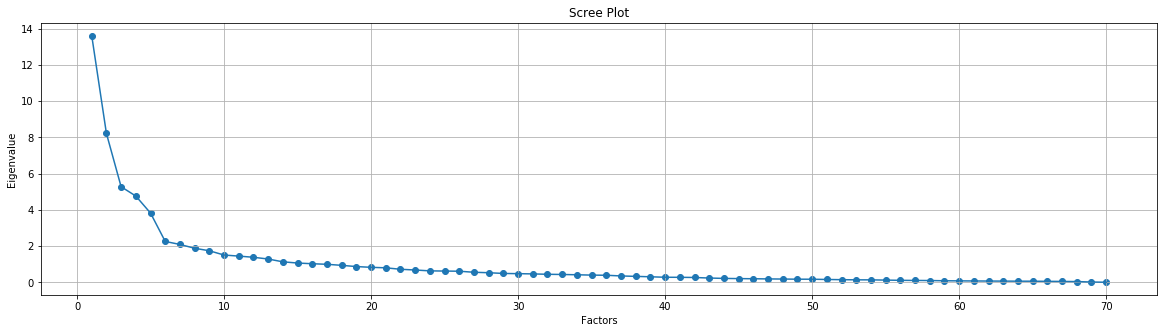

In [27]:
df = data
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [28]:
fa = FactorAnalyzer(n_factors = 20,rotation = "varimax")
fa.fit(data)
       


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=20, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [29]:
fa.loadings_

array([[ 0.06505965,  0.04117887,  0.92692402, ..., -0.01647619,
         0.01230794, -0.03777602],
       [ 0.13313337, -0.00242404,  0.8739116 , ...,  0.00254712,
         0.01563727, -0.04777566],
       [-0.05886434, -0.0603135 ,  0.43946956, ..., -0.04171689,
         0.0469853 ,  0.01040763],
       ...,
       [ 0.71957725,  0.16471878,  0.04262757, ..., -0.16551766,
         0.0449383 ,  0.14599808],
       [ 0.06272728, -0.2099095 ,  0.02357905, ...,  0.03585952,
        -0.30868216,  0.01536613],
       [ 0.16822675, -0.07118192, -0.01151133, ..., -0.05305358,
         0.10416589, -0.0167443 ]])

In [30]:
fa.get_factor_variance()

(array([10.12349779,  6.81482942,  4.15173952,  4.01396982,  3.59214371,
         2.77448439,  2.30357873,  2.20358073,  1.9236967 ,  1.4619134 ,
         1.31011914,  1.27127092,  1.26187223,  1.22255357,  1.20315725,
         1.1366622 ,  0.85873171,  0.84581145,  0.71359602,  0.6083262 ]),
 array([0.1446214 , 0.09735471, 0.05931056, 0.05734243, 0.05131634,
        0.03963549, 0.03290827, 0.03147972, 0.02748138, 0.02088448,
        0.01871599, 0.01816101, 0.01802675, 0.01746505, 0.01718796,
        0.01623803, 0.0122676 , 0.01208302, 0.01019423, 0.00869037]),
 array([0.1446214 , 0.2419761 , 0.30128667, 0.35862909, 0.40994543,
        0.44958092, 0.48248919, 0.51396892, 0.5414503 , 0.56233477,
        0.58105076, 0.59921178, 0.61723852, 0.63470357, 0.65189153,
        0.66812956, 0.68039716, 0.69248018, 0.70267441, 0.71136478]))

## Graphs


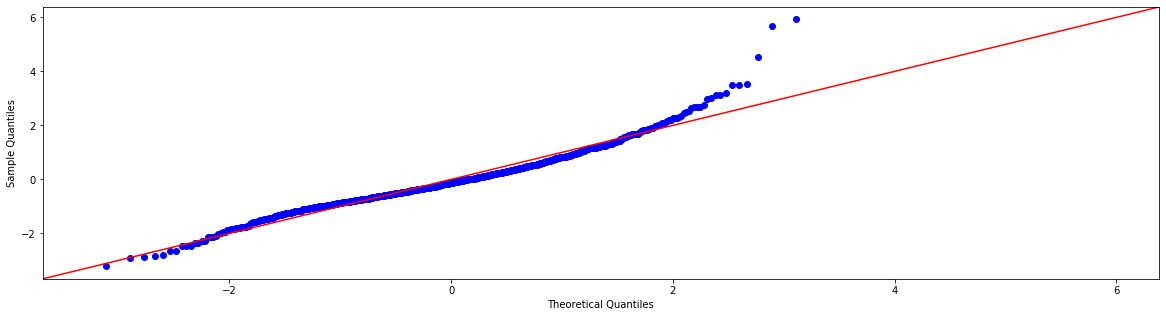

In [31]:

import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
  
# Random data points generated 
# data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data["feature_4"], line ='45') 
py.show() 

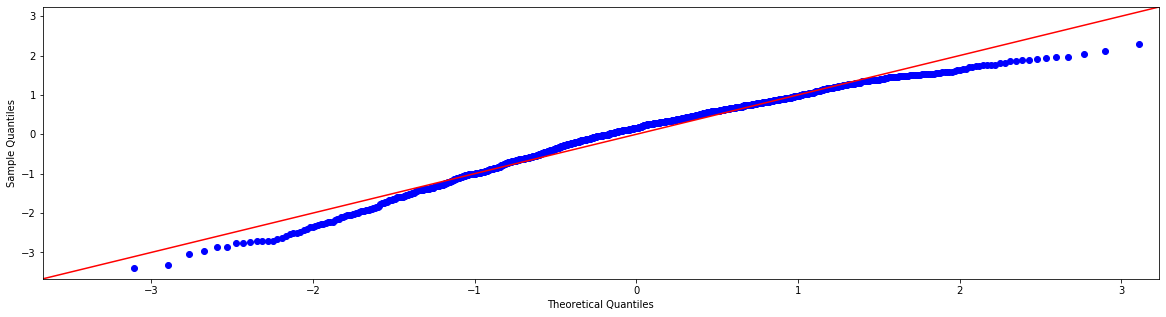

In [32]:
sm.qqplot(data["feature_5"], line ='45') 
py.show() 

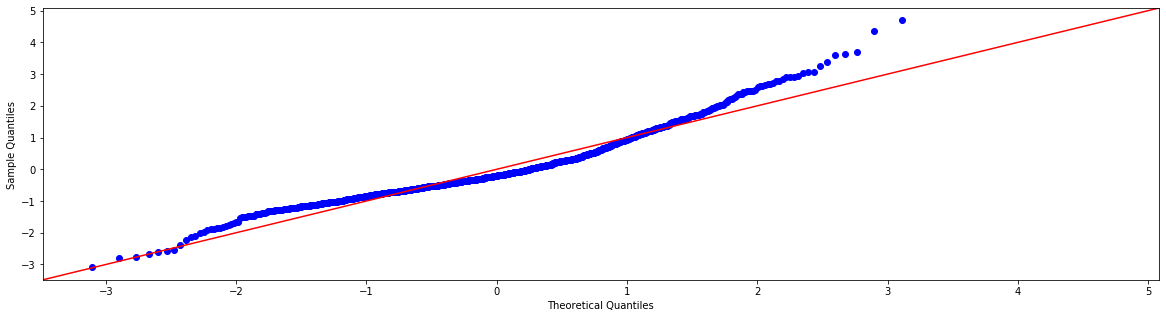

In [33]:
sm.qqplot(data["feature_25"], line ='45') 
py.show() 

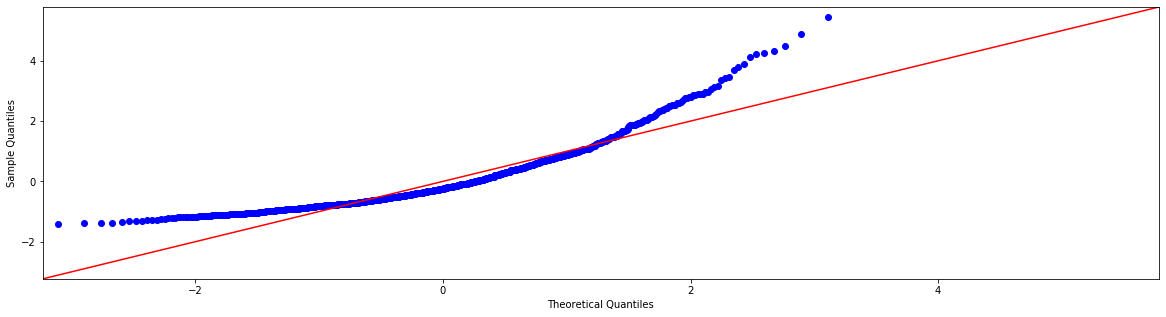

In [35]:
sm.qqplot(data["feature_65"], line ='45') 
py.show() 

## HISTOGRAMS

(array([ 6.,  4., 19., 35., 27., 44., 50., 57., 71., 62., 68., 57., 93.,
        58., 57., 48., 44., 41., 34., 22., 20., 18.,  9., 11., 14., 12.,
        11., 11.,  6.,  9.,  5.,  7.,  7.,  4.,  0.,  1.,  0.,  1.,  1.,
         1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.52946300e+00, -1.41977338e+00, -1.31008376e+00, -1.20039414e+00,
        -1.09070452e+00, -9.81014900e-01, -8.71325280e-01, -7.61635660e-01,
        -6.51946040e-01, -5.42256420e-01, -4.32566800e-01, -3.22877180e-01,
        -2.13187560e-01, -1.03497940e-01,  6.19168000e-03,  1.15881300e-01,
         2.25570920e-01,  3.35260540e-01,  4.44950160e-01,  5.54639780e-01,
         6.64329400e-01,  7.74019020e-01,  8.83708640e

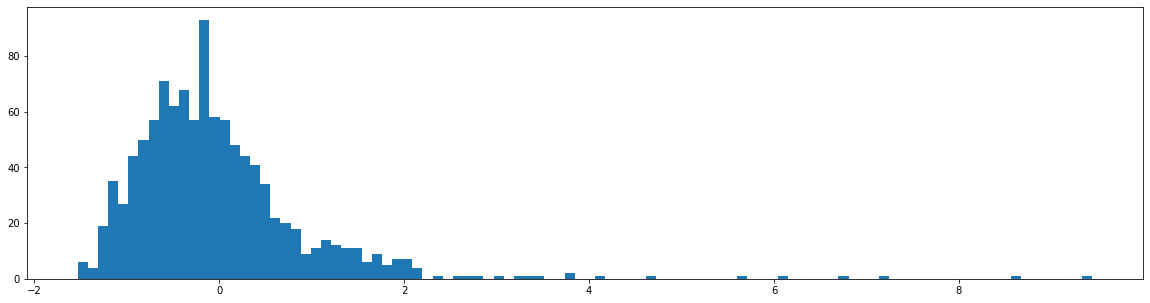

In [36]:
plt.hist(data["feature_1"] , bins =100)

(array([  8.,  23.,  30.,  37.,  49.,  41.,  68.,  74., 100.,  84.,  79.,
         68.,  68.,  51.,  38.,  47.,  31.,  27.,  19.,  11.,  20.,   8.,
         10.,   8.,   9.,   6.,   4.,   5.,   2.,   1.,   3.,   2.,   1.,
          3.,   2.,   3.,   2.,   0.,   2.,   1.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-1.354721  , -1.24404818, -1.13337536, -1.02270254, -0.91202972,
        -0.8013569 , -0.69068408, -0.58001126, -0.46933844, -0.35866562,
        -0.2479928 , -0.13731998, -0.02664716,  0.08402566,  0.19469848,
         0.3053713 ,  0.41604412,  0.52671694,  0.63738976,  0.74806258,
         0.8587354 ,  0.96

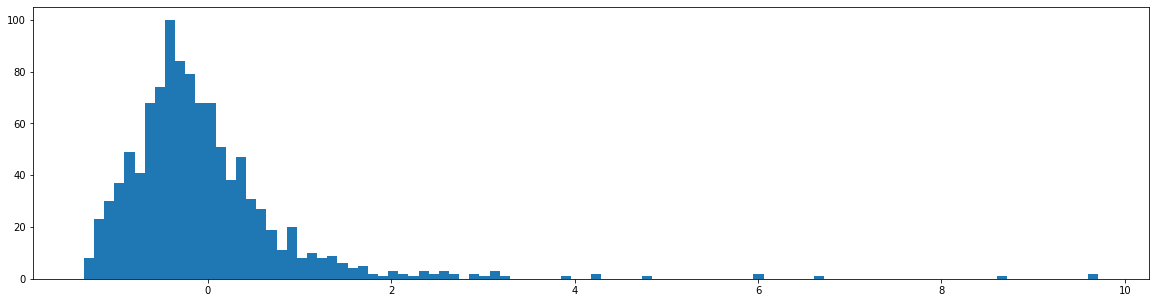

In [38]:
plt.hist(data["feature_19"] , bins =100)

(array([ 3.,  3., 14., 16., 30., 40., 51., 53., 39., 43., 59., 64., 35.,
        55., 48., 46., 41., 40., 39., 33., 37., 25., 27., 19., 24., 25.,
        11., 16., 15.,  9.,  9.,  8., 10.,  6.,  9.,  6.,  5.,  5.,  6.,
         5.,  4.,  2.,  3.,  1.,  3.,  2.,  6.,  0.,  0.,  0.,  0.,  2.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.614369  , -1.51492965, -1.4154903 , -1.31605095, -1.2166116 ,
        -1.11717225, -1.0177329 , -0.91829355, -0.8188542 , -0.71941485,
        -0.6199755 , -0.52053615, -0.4210968 , -0.32165745, -0.2222181 ,
        -0.12277875, -0.0233394 ,  0.07609995,  0.1755393 ,  0.27497865,
         0.374418  ,  0.47385735,  0.5732967 ,  0.67273605,  0.7721754 ,
         0.87161475,  0.9710541 ,  1.07049345,  1.1699328 ,  1.269372

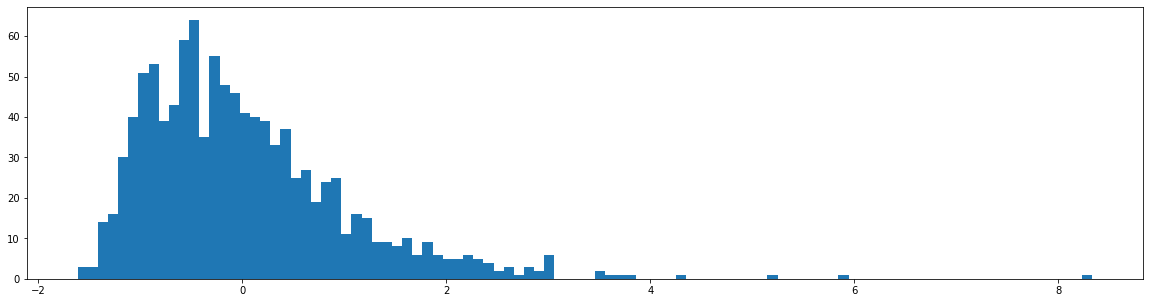

In [39]:
plt.hist(data["feature_63"] , bins =100)

(array([ 3.,  4., 13., 21., 35., 36., 38., 59., 48., 48., 52., 44., 47.,
        48., 50., 33., 42., 38., 29., 31., 33., 32., 19., 30., 23., 31.,
        14., 23.,  8.,  7., 11., 14.,  8.,  8.,  5.,  6.,  5.,  9.,  1.,
         5.,  4.,  4.,  0.,  1.,  0.,  1.,  2.,  2.,  1.,  5.,  0.,  1.,
         2.,  2.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.400707, -1.319813, -1.238919, -1.158025, -1.077131, -0.996237,
        -0.915343, -0.834449, -0.753555, -0.672661, -0.591767, -0.510873,
        -0.429979, -0.349085, -0.268191, -0.187297, -0.106403, -0.025509,
         0.055385,  0.136279,  0.217173,  0.298067,  0.378961,  0.459855,
         0.540749,  0.621643,  0.702537,  0.783431,  0.864325,  0.945219,
         1.026113,  1.107007,  1.187901,  1.268795,  1.349689,  

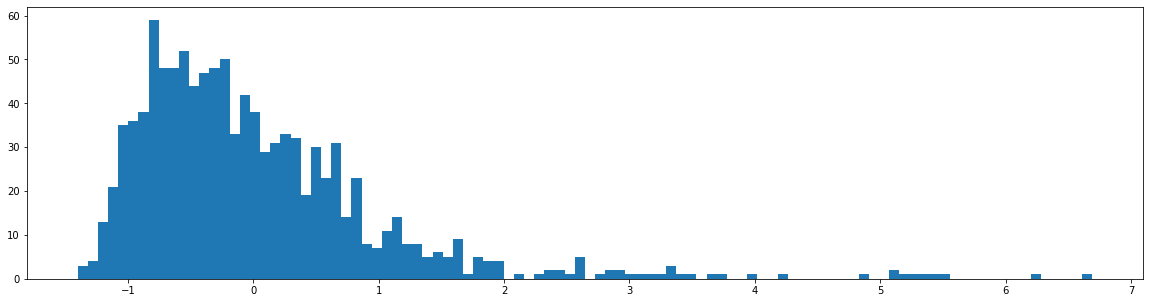

In [40]:
plt.hist(data["feature_45"] , bins =100)

plt.hist(data["feature_38"] , bins =100)

## Pearson Correlation Test


In [44]:

from scipy.stats import pearsonr
sample1 = data.sample(frac=0.5, replace=True, random_state=1)
sample2 = data.sample(frac=0.5, replace=True, random_state=2)

In [46]:
corr , p = pearsonr(sample1["feature_1"] ,sample2["feature_2"])

In [47]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(sample1, sample2)
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Probably the same distribution


Analysis of Variance Test (ANOVA)

In [48]:
from scipy.stats import f_oneway
stat, p = f_oneway(sample1, sample2)
# print('stat=%.3f, p=%.3f' % (stat, p))
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Probably the same distribution


Test for Equal variances

In [49]:
from scipy.stats import levene

levene(sample1["feature_1"],sample2["feature_2"])

LeveneResult(statistic=0.6812329802110032, pvalue=0.4093485352124372)

# Estimators

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)


scaled_Xtrain = X_scaler.transform(Xtrain)
scaler = StandardScaler()
scaled_Xtest = X_scaler.transform(Xtest)
print(scaled_Xtrain.shape)
ytrain.shape

(211, 68)


(211,)

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
# from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

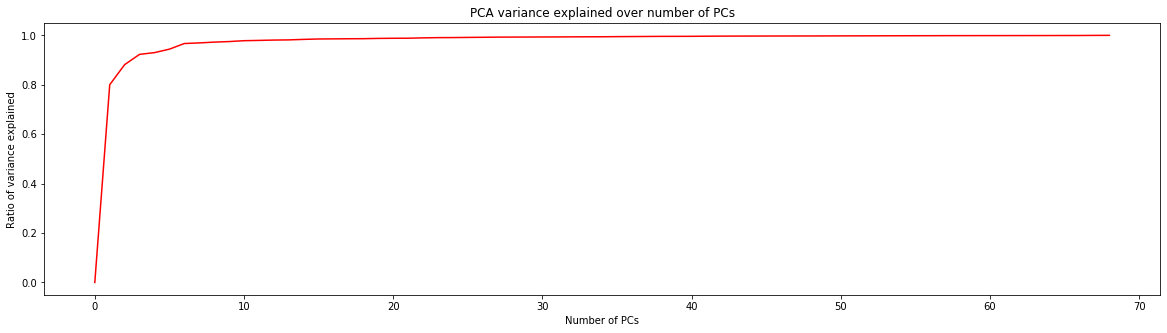

In [61]:
PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(PCA_var_exp), 1), PCA_var_exp, c = 'r')
plt.show()

## Feature Selection

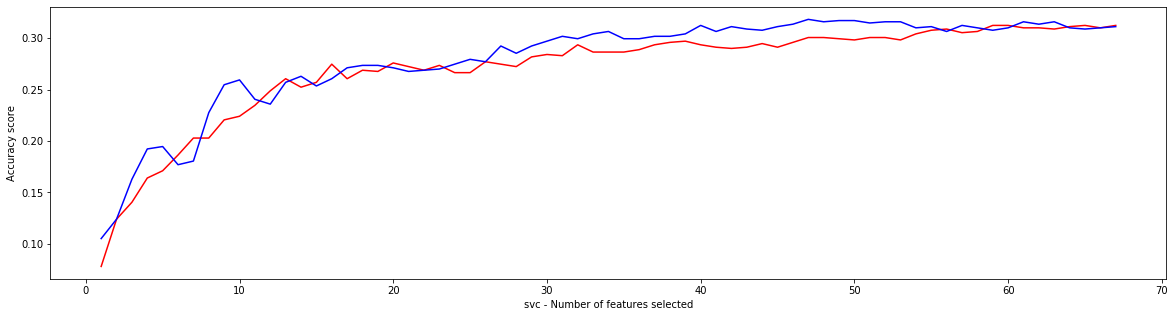

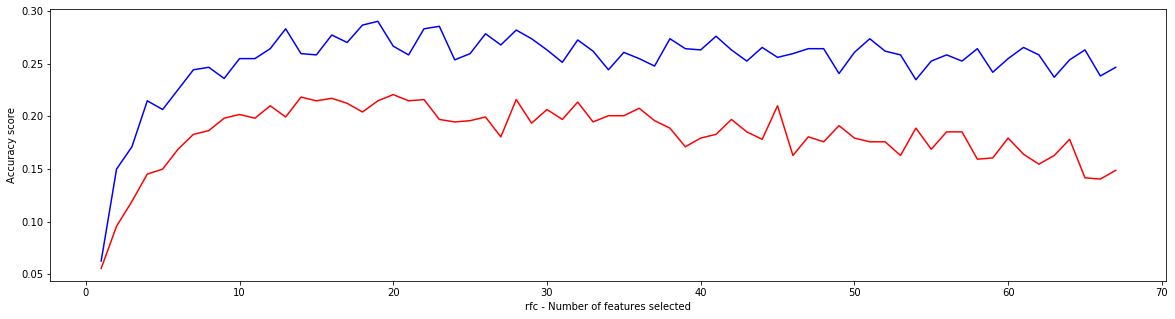

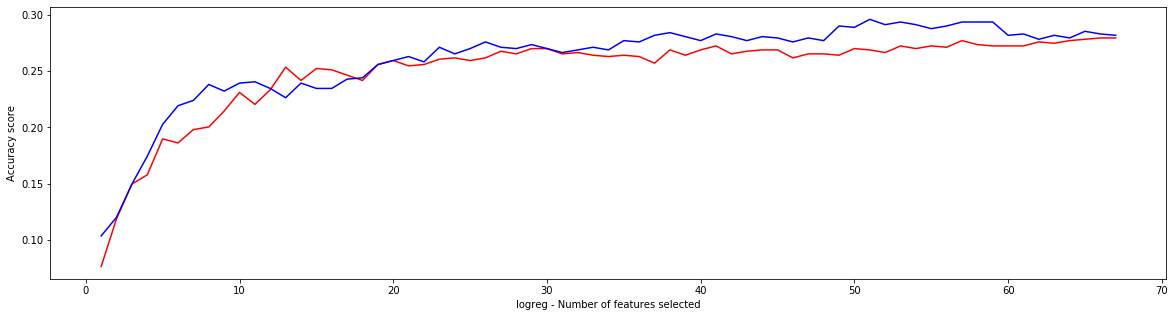

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, ParameterGrid
# from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression



#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-1, 3, 1)], 
                 'gamma': [10**x for x in range(-1, 2, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(3, 5, 1)]}

params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

rfe_best_model = {}
pca_best_model = {}
                          

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model[estimator] = []
    pca_best_model[estimator] = []
    
    for n_comps in range(1, scaled_Xtrain.shape[1], 1):
        rfe_best_model[estimator].append(0)
        pca_best_model[estimator].append(0)
            
        for params_combo in grid:
        
            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
            rfe.fit(scaled_Xtrain, ytrain)

            if (rfe.score(scaled_Xtest, ytest) > rfe_best_model[estimator][n_comps - 1]):
                rfe_best_model[estimator][n_comps - 1] = rfe.score(scaled_Xtest, ytest)
                
            PCA_model = PCA(n_components = n_comps)
            PCA_model.fit(scaled_Xtrain)
            PCA_Xtrain = PCA_model.transform(scaled_Xtrain)
            PCA_Xtest = PCA_model.transform(scaled_Xtest)
            
            estimator_iter.fit(PCA_Xtrain, ytrain)
            
            if (estimator_iter.score(PCA_Xtest, ytest) > pca_best_model[estimator][n_comps - 1]):
                pca_best_model[estimator][n_comps - 1] = estimator_iter.score(PCA_Xtest, ytest)

    plt.figure()
    plt.xlabel("%s - Number of features selected" % estimator)
    plt.ylabel("Accuracy score")
    plt.plot(range(1, len(pca_best_model[estimator]) + 1, 1), pca_best_model[estimator], c = 'r')
    plt.plot(range(1, len(rfe_best_model[estimator]) + 1, 1), rfe_best_model[estimator], c = 'b')
    plt.show()

In [63]:
rfe_best_model_2 = {}
pca_best_model_2 = {}

rfe_best_model_2['svc'] = []
rfe_best_model_2['rfc'] = []
rfe_best_model_2['logreg'] = []

accuracies = {}

accuracies['svc'] = [0]
accuracies['rfc'] = [0]

accuracies['logreg'] = [0]

features = {}

features['svc'] = []
features['rfc'] = []
features['logreg'] = []

estimator_list = []

n_comps = 20
                          
for i, estimator in enumerate(estimators):
    
    estimator_list.append(estimator)
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model_2[estimator] = []
    
    rfe_best_model_2[estimator].append(0)
    #pca_best_model_2[estimator].append(0)

    for params_combo in grid:
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)

        rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
        rfe.fit(scaled_Xtrain, ytrain)

        if (rfe.score(scaled_Xtest, ytest) > accuracies[estimator][0]):
            accuracies[estimator][0] = [rfe.score(scaled_Xtest, ytest)]
            features[estimator] = rfe.support_


In [64]:
import pandas as pd

est_columns = ['SVC','RFC','Log_Reg'] 
est_index = ['feature_%d'%i for i in range(0,len(features['svc']))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
est_df = pd.DataFrame(index=est_index, columns=est_columns)
est_df

for i in range(0, len(features['svc'])):
    est_df.iloc[i, 0] = features['svc'][i]
    est_df.iloc[i, 1] = features['rfc'][i]
    est_df.iloc[i, 2] = features['logreg'][i]
    
print('Features used by any Estimator')
est_df[est_df['SVC'] | est_df['RFC'] | est_df['Log_Reg']]

Features used by any Estimator


,SVC,RFC,Log_Reg
feature_1,False,True,False
feature_3,False,True,False
feature_4,True,True,True
feature_6,True,False,True
feature_7,True,True,True
feature_8,True,True,True
feature_10,True,False,True
feature_11,False,False,True
feature_12,True,False,False
feature_14,True,True,False


In [65]:
print('Features used by all Estimators')
est_df[est_df['SVC'] & est_df['RFC'] & est_df['Log_Reg']]

Features used by all Estimators


,SVC,RFC,Log_Reg
feature_4,True,True,True
feature_7,True,True,True
feature_8,True,True,True
feature_20,True,True,True
feature_35,True,True,True
feature_52,True,True,True
feature_55,True,True,True


In [66]:
from sklearn.feature_selection import RFE

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

rfc = RandomForestClassifier(n_estimators=35)

rfe = RFE(estimator = rfc, n_features_to_select=20)
rfe.fit(Xtrain, ytrain)
X_reduced = rfe.transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.8, random_state=1234)

In [67]:
X_reduced.shape

(1059, 20)

## Model Building

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['knn'] = KNeighborsClassifier
# estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-2, 3, 1)], 
                 'gamma': [10**x for x in range(-2, 3, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(1, 8, 1)]}

params['knn'] = {'n_neighbors': range(1, 15, 1), 'p': [1, 2]}
# params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    best_model[estimator] = [0]
    
    for params_combo in grid:
        
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
            
        estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 10, scoring='accuracy') # smallest class has 2 members
        
        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params]

    print("For %s the best cv accuracy score is %s" % (estimator, best_model[estimator][0]))

For svc the best cv accuracy score is 0.3624321730900678
For rfc the best cv accuracy score is 0.3448291949278791
For knn the best cv accuracy score is 0.41179693113903637


## Reclustering

In [76]:
import csv
with open('./dataset/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = range(2, 33, 1)

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, max_iter = 300, algorithm='full')
    kmeans = kmeans.fit(y_coords)
    labels = kmeans.predict(y_coords)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, labels, test_size=0.8, random_state=1234)

    best_model = {}

    for i, estimator in enumerate(estimators):
        model_params = ParameterGrid(params[estimator])
        grid = model_params

        best_model[estimator] = [0]
        #accuracies[estimator] = []

        for params_combo in grid:

            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            #estimator_iter.fit(Xtrain, ytrain)
            scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 10, scoring='accuracy') # smallest class has 2 members

            if (scores.mean() > best_model[estimator][0]):
                best_model[estimator] = [scores.mean(), estimator_iter.get_params]

        accuracies[estimator].append(best_model[estimator][0])

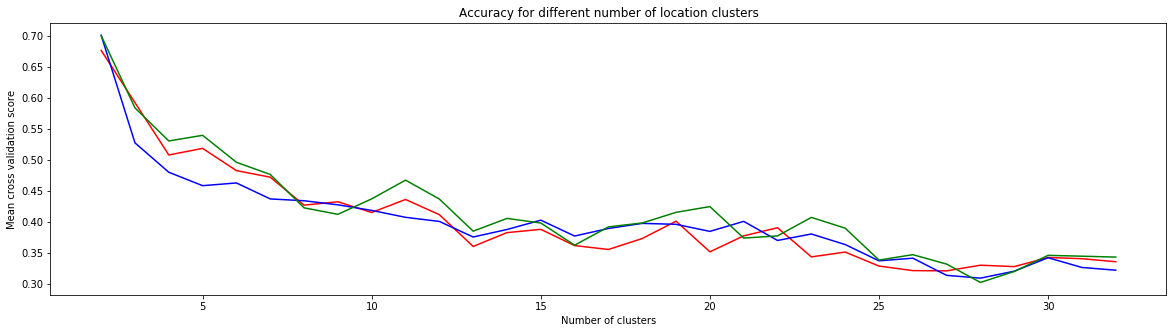

In [77]:
plt.figure()
plt.xlabel("Number of clusters")
plt.ylabel("Mean cross validation score")
plt.title("Accuracy for different number of location clusters")
plt.plot(range(2, len(accuracies['knn']) + 2),accuracies['knn'], c = 'r')
plt.plot(range(2, len(accuracies['svc']) + 2),accuracies['svc'], c = 'b')
plt.plot(range(2, len(accuracies['rfc']) + 2),accuracies['rfc'], c = 'g')
plt.show()

<Figure size 1440x360 with 0 Axes>

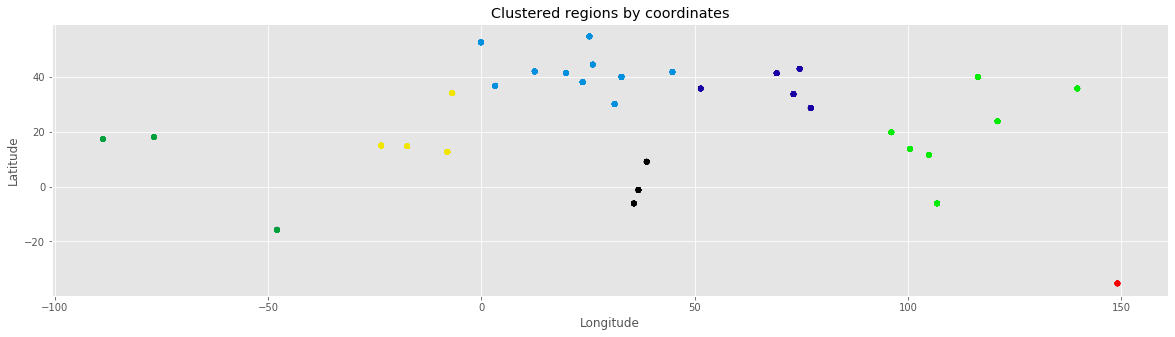

<Figure size 1440x360 with 0 Axes>

In [79]:
with open('./dataset/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)

#print('Centroids')
centroids = kmeans.cluster_centers_
#print(centroids)

plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [80]:
best_model

{'svc': [0.32250657231593427,
  <bound method BaseEstimator.get_params of SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
      max_iter=-1, probability=False, random_state=1234, shrinking=True,
      tol=0.001, verbose=False)>],
 'rfc': [0.3436386464270432,
  <bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=35,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)>],
 'knn': [0.33615707341848144,
  <bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='a

In [82]:
with open('./dataset/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = 7

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

kmeans = KMeans(n_clusters=n_clusters, max_iter = 300, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, labels, test_size=0.8, random_state=1234)

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params

    best_model[estimator] = [0]
    #accuracies[estimator] = []

    for params_combo in grid:

        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
        estimator_iter.fit(Xtrain, ytrain)
        #estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtest, ytest, cv = 10, scoring='accuracy') # smallest class has 2 members

        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params, estimator_iter.predict(Xtest)]
            best_model[estimator].append(params_combo)

    accuracies[estimator].append(best_model[estimator][0])

In [89]:
acc_index = ['Accuracy Score', 'parameters', 'parameter values'] 
acc_columns = ['SVC', 'Random Forest', 'KNN']

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
acc_df = pd.DataFrame(index=acc_index, columns=acc_columns)
#est_df

acc_df.iloc[0, 0] = best_model['svc'][0]
acc_df.iloc[0, 1] = best_model['rfc'][0]
acc_df.iloc[0, 2] = best_model['knn'][0]
acc_df.iloc[1, 0] = list(best_model['svc'][3])
acc_df.iloc[1, 1] = list(best_model['rfc'][3])
acc_df.iloc[1, 2] = list(best_model['knn'][3])
acc_df.iloc[2, 0] = list(best_model['svc'][3].values())
acc_df.iloc[2, 1] = list(best_model['rfc'][3].values())
acc_df.iloc[2, 2] = list(best_model['knn'][3].values())

acc_df

,SVC,Random Forest,KNN
Accuracy Score,0.4694,0.5281,0.5471
parameters,"[C, gamma, kernel, random_state]",[n_estimators],"[n_neighbors, p]"
parameter values,"[10, 0.01, linear, 1234]",[30],"[4, 1]"


ValueError: 'c' argument has 848 elements, which is not acceptable for use with 'x' with size 1059, 'y' with size 1059.

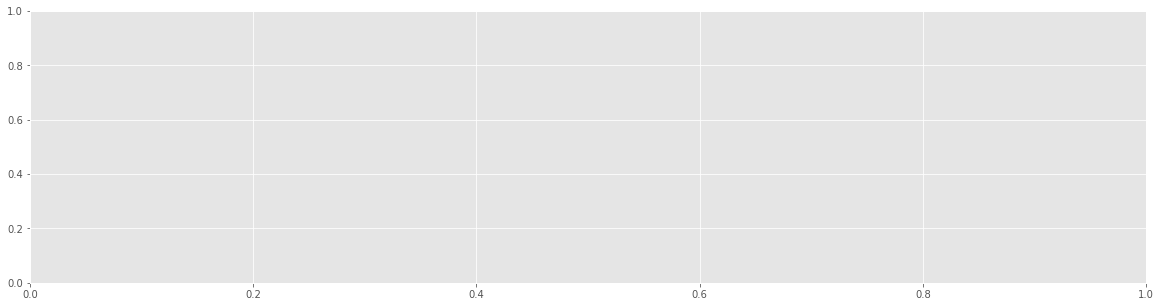

In [90]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['svc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by SVC classification (Accuracy score: %s)" % best_model['svc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

ValueError: 'c' argument has 848 elements, which is not acceptable for use with 'x' with size 1059, 'y' with size 1059.

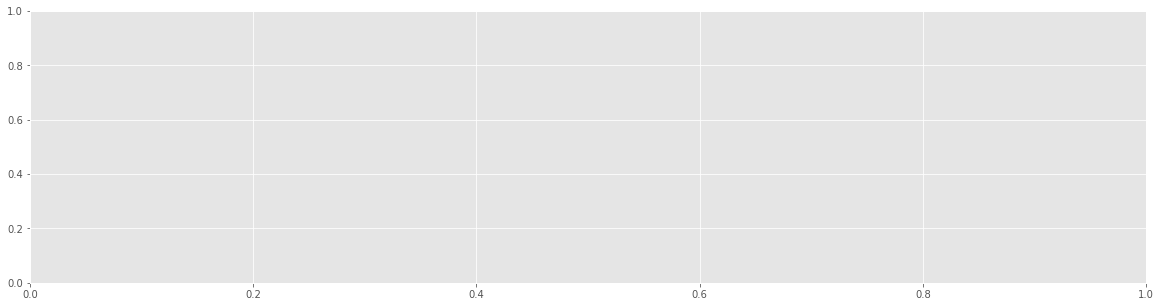

In [91]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['knn'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by KNN classification (Accuracy score: %s)" % best_model['knn'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

ValueError: 'c' argument has 848 elements, which is not acceptable for use with 'x' with size 1059, 'y' with size 1059.

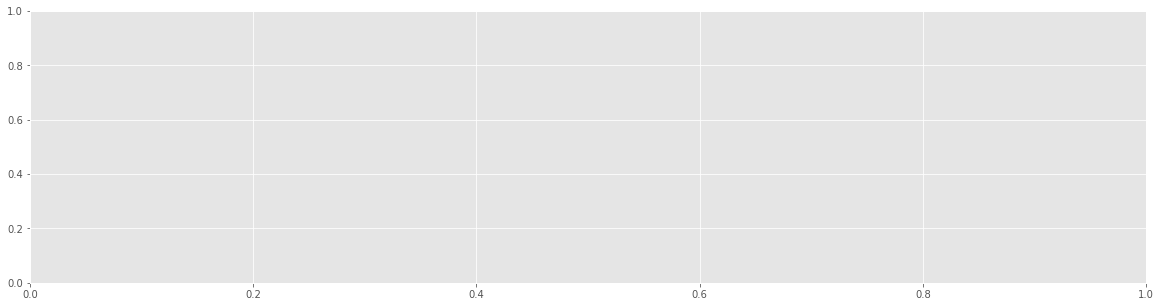

In [92]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['rfc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by Random Forest classification (Accuracy score: %s)" % best_model['rfc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [93]:
# import pandas as pd

results_columns = ['Geo', 'SVC','RFC','KNN'] 
results_index = ['obs_%d'%i for i in range(0,len(best_model['svc'][2]))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
results_df = pd.DataFrame(index=results_index, columns=results_columns)
results_df

for i in range(0, len(best_model['svc'][2])):
    results_df.iloc[i, 0] = ytest[i]
    results_df.iloc[i, 1] = best_model['svc'][2][i]
    results_df.iloc[i, 2] = best_model['rfc'][2][i]
    results_df.iloc[i, 3] = best_model['knn'][2][i]
    
correct_columns = ['SVC', 'RFC', 'KNN']
correct_index = ['Correct', 'Incorrect']

pd.options.display.float_format = '{:,.4g}'.format
correct_df = pd.DataFrame(index=correct_index, columns=correct_columns)
correct_df

for i in range(0, 3, 1):
    correct_df.iloc[0, i] = len(results_df[results_df['Geo'] == results_df.iloc[:, i+1]])
    correct_df.iloc[1, i] = len(results_df[results_df['Geo'] != results_df.iloc[:, i+1]])
    
correct_df

,SVC,RFC,KNN
Correct,17,20,19
Incorrect,831,828,829


In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import BaggingClassifier
# # from sklearn.ensemble import RidgeClassifier
# from sklearn.linear_model import RidgeClassifier
# # Create classifiers
# seed = 1234
# rf = RandomForestClassifier()
# et = ExtraTreesClassifier()
# knn = KNeighborsClassifier()
# svc = SVC()
# rg = RidgeClassifier()
# clf_array = [rf, et, knn, svc]
# for clf in clf_array:
#     vanilla_scores = cross_val_score(clf, Xtest, ytest, cv=10, n_jobs=-1)
#     bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
#     bagging_scores = cross_val_score(bagging_clf, X, y, cv=10,n_jobs=-1)
    
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

In [95]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=20,random_state=10)
cart = DecisionTreeClassifier()
num_trees = 200
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=10)
results = model_selection.cross_val_score(model, Xtest, ytest, cv=kfold)
print(results.mean())

0.4612956810631229
